In [1]:
# Data processing
import iris
import numpy as np
from pathlib import Path
# Visualization
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default'] = 'regular'

In [2]:
# Choose experiment
exp = 'xmekm'
path_to_ukca = Path(f'../data/{exp}')
# Load preprocessed variables
airmass = iris.load_cube(str(path_to_ukca)+f'/{exp}_airmass.nc')
o3 = iris.load_cube(str(path_to_ukca)+f'/{exp}_o3.nc')
ch4 = iris.load_cube(str(path_to_ukca)+f'/{exp}_ch4.nc')
no = iris.load_cube(str(path_to_ukca)+f'/{exp}_no.nc')
no2 = iris.load_cube(str(path_to_ukca)+f'/{exp}_no2.nc')
hno3 = iris.load_cube(str(path_to_ukca)+f'/{exp}_hno3.nc')
pan = iris.load_cube(str(path_to_ukca)+f'/{exp}_pan.nc')
ppan = iris.load_cube(str(path_to_ukca)+f'/{exp}_ppan.nc')
# meono2 = iris.load_cube(str(path_to_ukca)+f'/{exp}_meono2.nc')
# etono2 = iris.load_cube(str(path_to_ukca)+f'/{exp}_etono2.nc')
# prono2 = iris.load_cube(str(path_to_ukca)+f'/{exp}_prono2.nc')

In [3]:
# Path to figures
path_to_figs = Path('../../../results') / exp / 'metrics'
path_to_figs.mkdir(exist_ok=True) # create a new folder if it doesn't exist

#### Calculate whole atmosphere burdens

In [4]:
o3_burden_whole_atm = (o3*airmass).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9
ch4_burden_whole_atm = (ch4*airmass).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9
no_burden_whole_atm = (no*airmass).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9
no2_burden_whole_atm = (no2*airmass).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9
hno3_burden_whole_atm = (hno3*airmass).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9
pan_burden_whole_atm = (pan*airmass).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9
ppan_burden_whole_atm = (ppan*airmass).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9
# meono2_burden_whole_atm = (meono2*airmass).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9
# etono2_burden_whole_atm = (etono2*airmass).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9
# prono2_burden_whole_atm = (prono2*airmass).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9

/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/cube.py:3180: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'model_level_number'.
  warnings.warn(msg.format(self.name()))
/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


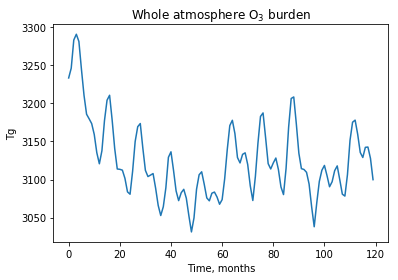

In [13]:
plt.plot(o3_burden_whole_atm.data)
plt.title('Whole atmosphere $O_3$ burden')
plt.xlabel('Time, months')
plt.ylabel('Tg');
# plt.savefig(path_to_figs / f'{exp}_o3_burden_whole_atm.png')

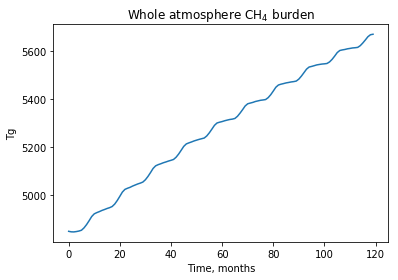

In [12]:
plt.plot(ch4_burden_whole_atm.data)
plt.title('Whole atmosphere $CH_4$ burden')
plt.xlabel('Time, months')
plt.ylabel('Tg');
# plt.savefig(path_to_figs / f'{exp}_ch4_burden_whole_atm.png');

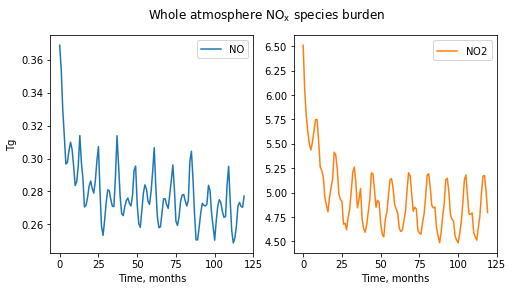

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].plot(no_burden_whole_atm.data, label='NO', color='C0')
ax[1].plot(no2_burden_whole_atm.data, label='$NO2$', color='C1')
ax[0].set_ylabel('Tg')
fig.suptitle('Whole atmosphere $NO_x$ species burden')
for iax in ax.flatten():
    iax.set_xlabel('Time, months')
    iax.legend()
fig.savefig(path_to_figs / f'{exp}_nox_burden_whole_atm.png')

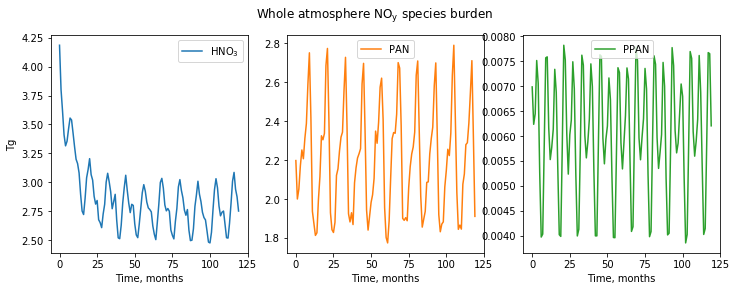

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].plot(hno3_burden_whole_atm.data, label='$HNO_3$', color='C0')
ax[1].plot(pan_burden_whole_atm.data, label='PAN', color='C1')
ax[2].plot(ppan_burden_whole_atm.data, label='PPAN', color='C2')
ax[0].set_ylabel('Tg')
fig.suptitle('Whole atmosphere $NO_y$ species burden')
for iax in ax.flatten():
    iax.set_xlabel('Time, months')
    iax.legend()
fig.savefig(path_to_figs / f'{exp}_noy_burden_whole_atm.png')

In [9]:
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
# ax[0].plot(meono2_burden_whole_atm.data, label='$MeONO_2$', color='C0')
# ax[1].plot(etono2_burden_whole_atm.data, label='$EtONO_2$', color='C1')
# ax[2].plot(prono2_burden_whole_atm.data, label='$PrONO_2$', color='C2')
# ax[0].set_ylabel('kg')
# fig.suptitle('Whole atmosphere $RONO_2$ species burden')
# for iax in ax.flatten():
#     iax.set_xlabel('Time, months')
#     iax.legend()
# fig.savefig(path_to_figs / f'{exp}_rono2_species_burden_whole_atm.png')

#### Calculate tropospheric burdens

In [10]:
M_air = 28.97 # molar mass of dry air [kg]
coeff_o3 = (M_air/48.00)*1e9
# Define chemical troposphere as one where ozone mixing ratio is < 120 ppbv
chem_trop_mask = np.ma.masked_less(o3.data*coeff_o3, 120).mask
o3_burden_trop = (o3*airmass*chem_trop_mask).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)*1e-9

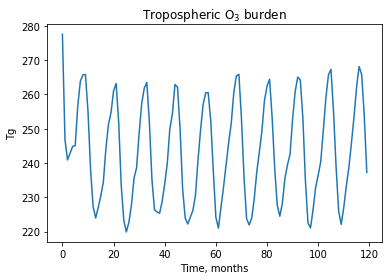

In [11]:
plt.plot(o3_burden_trop.data)
plt.title('Tropospheric $O_3$ burden')
plt.xlabel('Time, months')
plt.ylabel('Tg');
plt.savefig(path_to_figs / f'{exp}_o3_burden_trop.png')